In [1]:
! eups list -s lsst_distrib

   21.0.0-2-g8e5b5ee+0374c0674c 	w_latest current w_2021_21 setup


In [2]:
import numpy
import pylab

# Stack imports
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.meas.extensions.shapeHSM
import lsst.afw.image as afwImage
from lsst.ip.isr.isrTask import IsrTask
from lsst.obs.lsst import LsstCam
from lsst.cp.pipe import BrighterFatterKernelSolveTask    
#from mixcoatl.characterizeSpots import CharacterizeSpotsTask
#from mixcoatl.gridFitTask import GridFitTask

In [3]:
repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/spot_test_v2/butler.yaml"
butler = Butler(repo_path)
#collections = "/calib/run_12781_v3"
collections = 'LSSTCam/raw/all,LSSTCam/calib,u/youtsumi/run_12781/bf_work/ptcs/20210610T163510Z'.split(",")
where = """
instrument='LSSTCam'
and detector=29
and exposure.observation_type = 'flat'
"""
#collections = 'u/echarles/calib/bias/run_12781/20210326T180033Z'
subbutler = Butler(repo_path,collections=collections)
subregistry = subbutler.registry
for dtype in subregistry.queryDatasetTypes():
    try:
        datasetRefs = list(subregistry.queryDatasets(datasetType=dtype,collections=collections,where = where))
        print(len(datasetRefs), dtype )
    except:
        print("Error", dtype )


114 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpBiasProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
72 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
Error DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
0 DatasetType('cpCombine_metadata', {instrument, detector}, PropertySet)
114 DatasetType('isr_config', {}, Config)
0 DatasetType('cpCombine_config', {}, Config)
114 DatasetType('packages', {}, Packages)
Error DatasetType('camera', {instrument}, Camera, isCalibration=True)
0 DatasetType('cpDarkIsr', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDarkProc', {band, instrument, detector, physical_filter, exposure}, Exposure)
0 DatasetType('cpDark_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
Error DatasetType('dark', {instrument, detector}, ExposureF, isCalib

In [4]:
num = 0
datasetRefs = list(subregistry.queryDatasets(datasetType="raw",collections=collections))
raw = subbutler.get(datasetRefs[num])
datasetRefs = list(subregistry.queryDatasets(datasetType="ptc",collections=["u/youtsumi/run_12781/bf_work/ptcs/20210610T163510Z"]))        
ptc = subbutler.get(datasetRefs[num])
bfk = BrighterFatterKernelSolveTask()
bfk.config.forceZeroSum = True
bfk.config.correlationModelRadius = 3 
new = bfk.run(ptc,[raw],LsstCam().getCamera(),datasetRefs[num].dataId)

In [5]:
new.getDict()["outputBFK"].toTable()[0].colnames

['AMPLIFIER',
 'MEANS',
 'VARIANCES',
 'RAW_XCORRS',
 'GAIN',
 'NOISE',
 'MEAN_XCORRS',
 'KERNEL',
 'VALID']

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


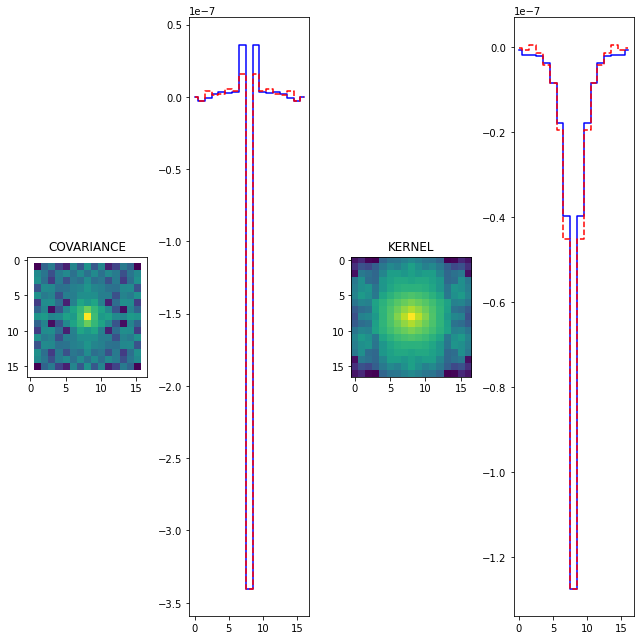

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


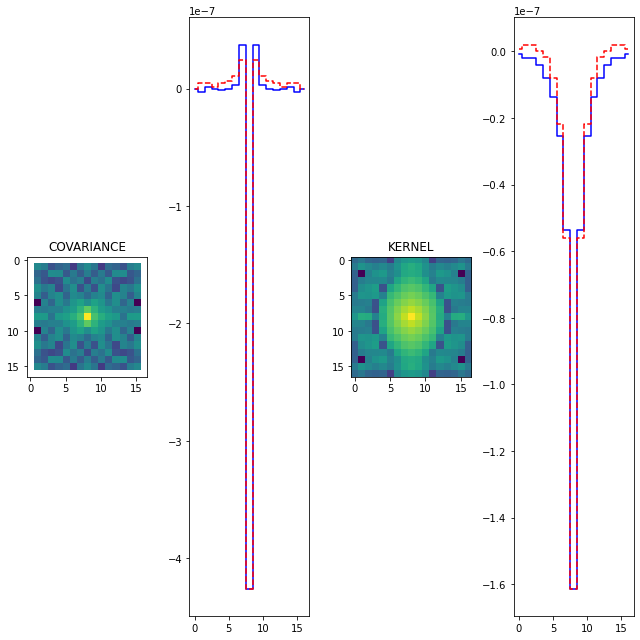

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


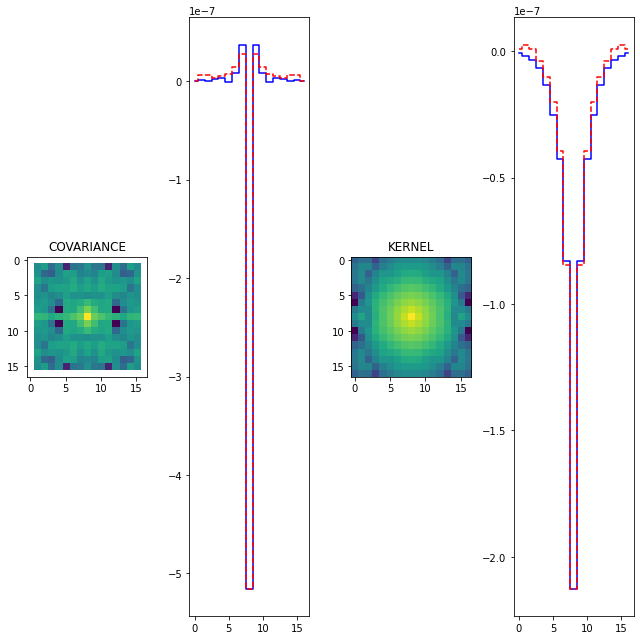

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


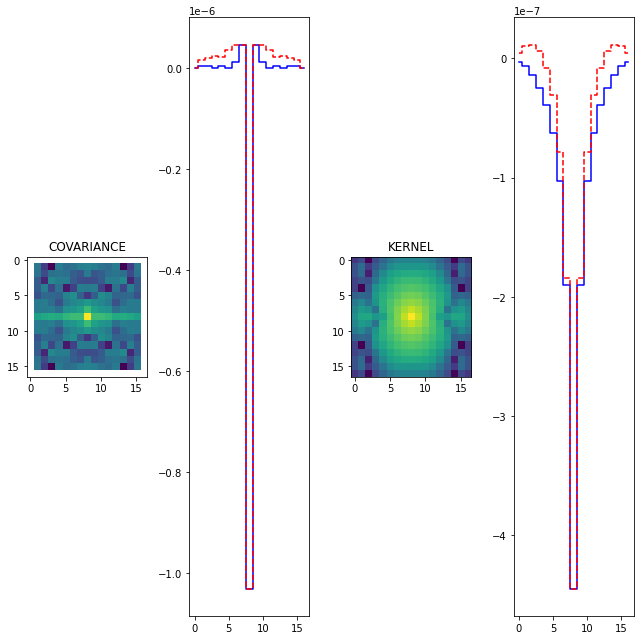

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


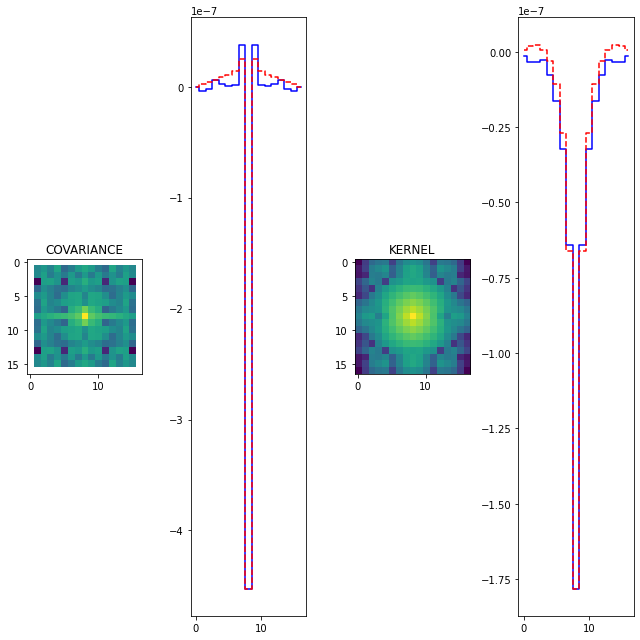

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


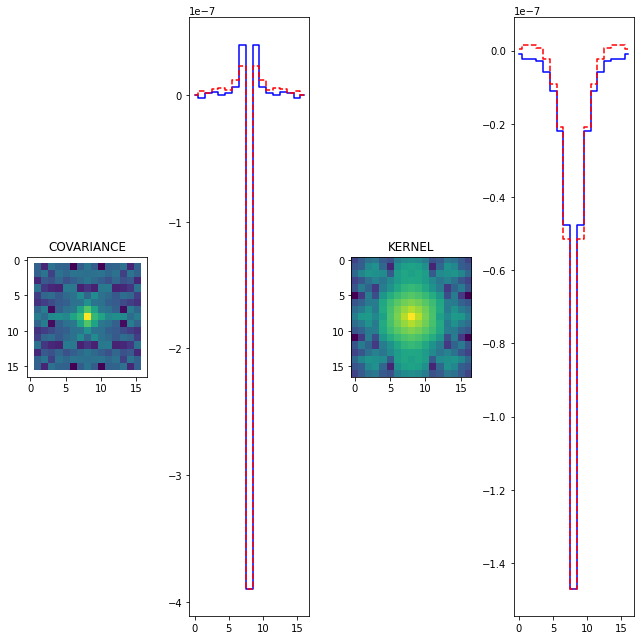

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


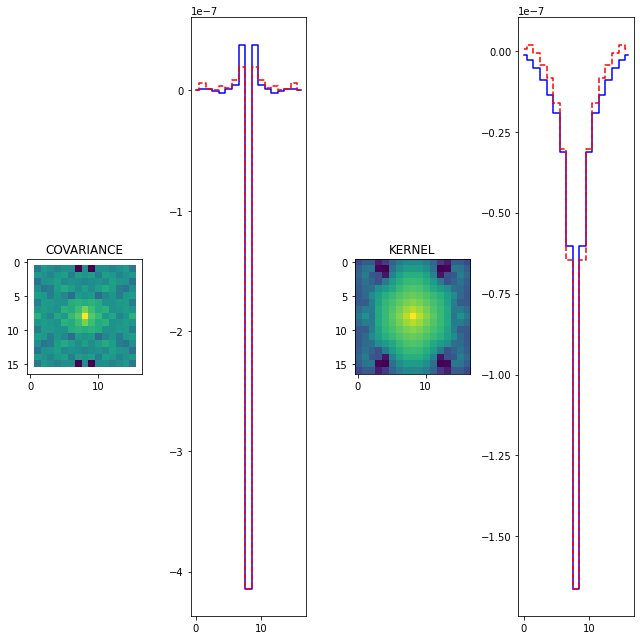

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


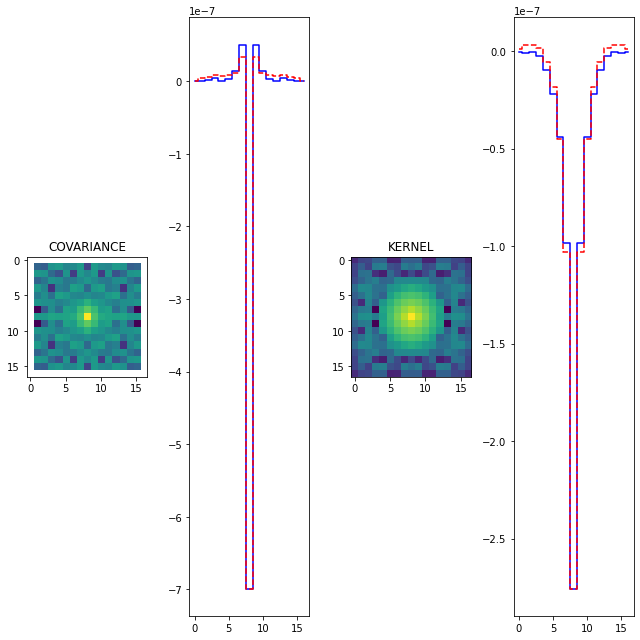

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


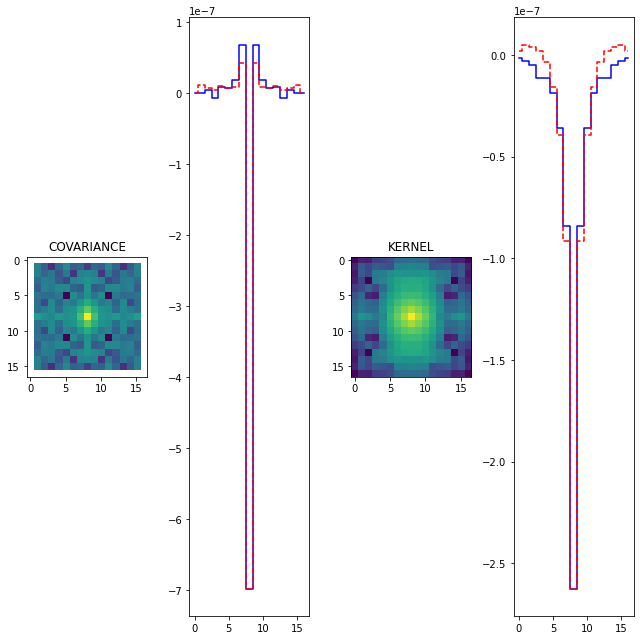

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


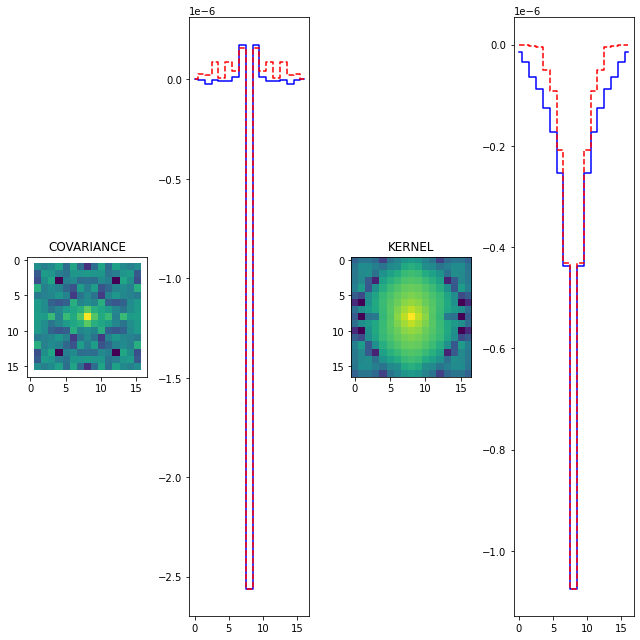

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


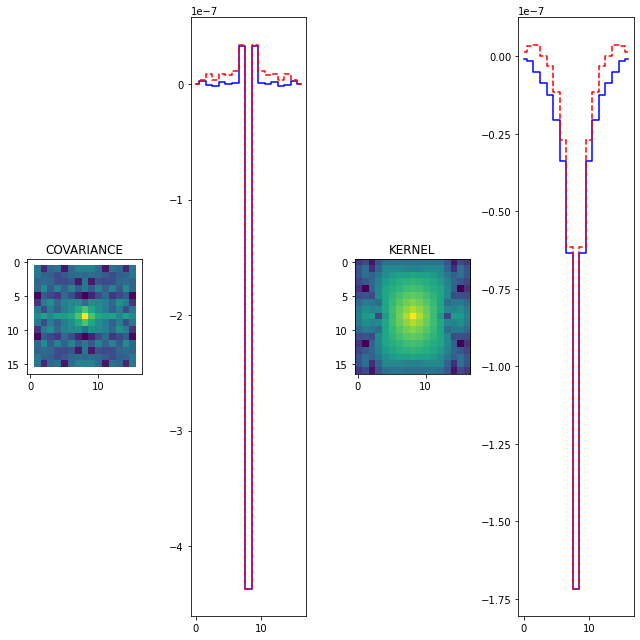

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


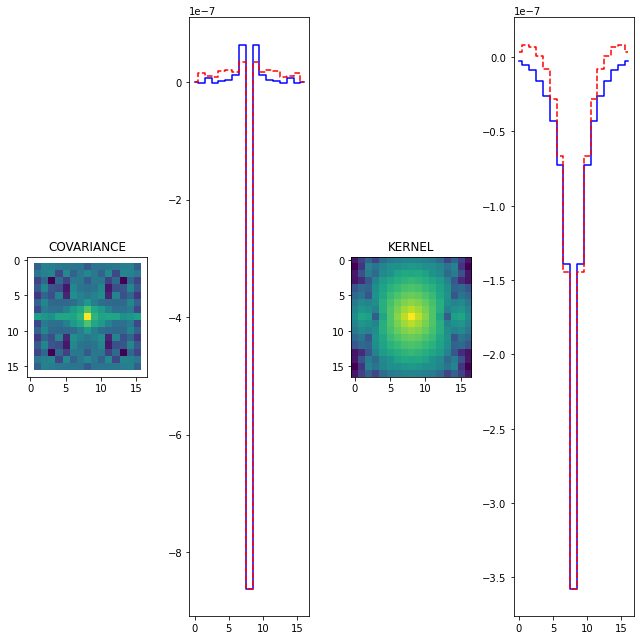

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


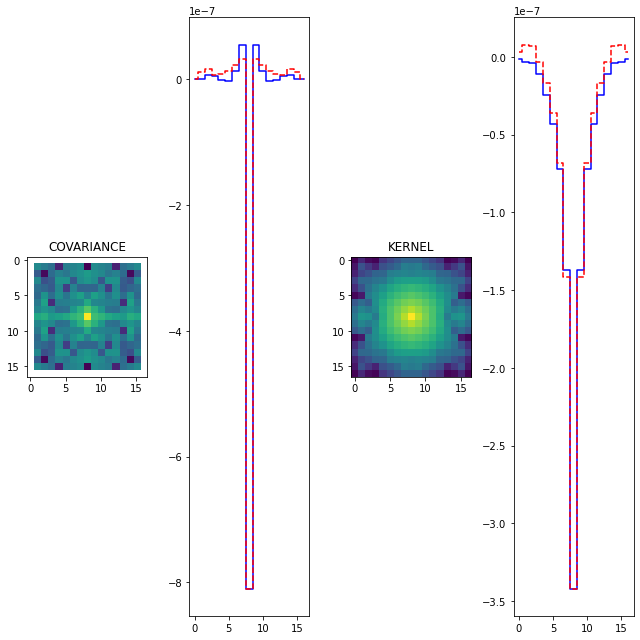

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


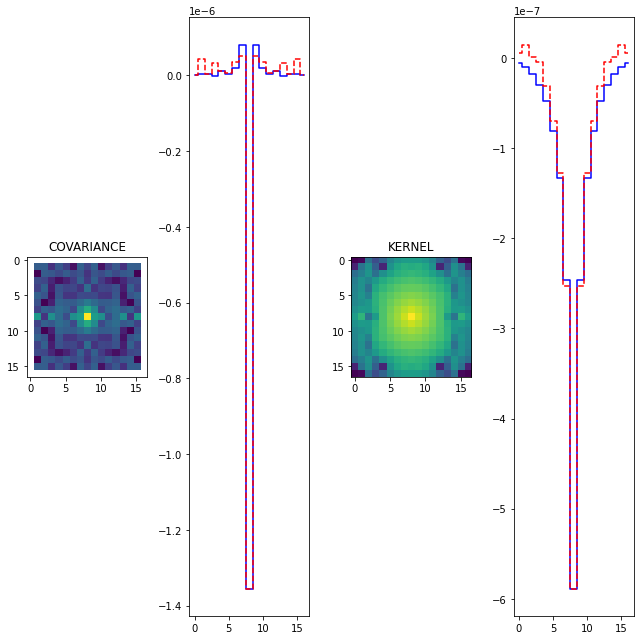

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


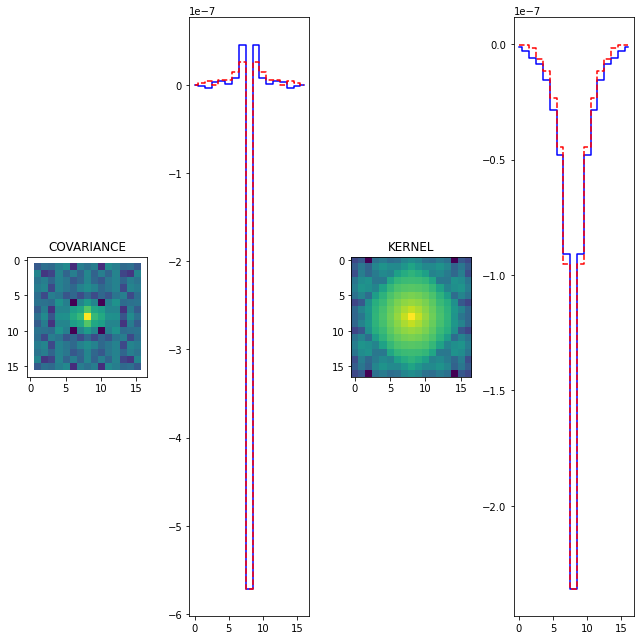

<ipython-input-6-21823672aeb2>:6: RuntimeWarning: divide by zero encountered in log10
  axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))


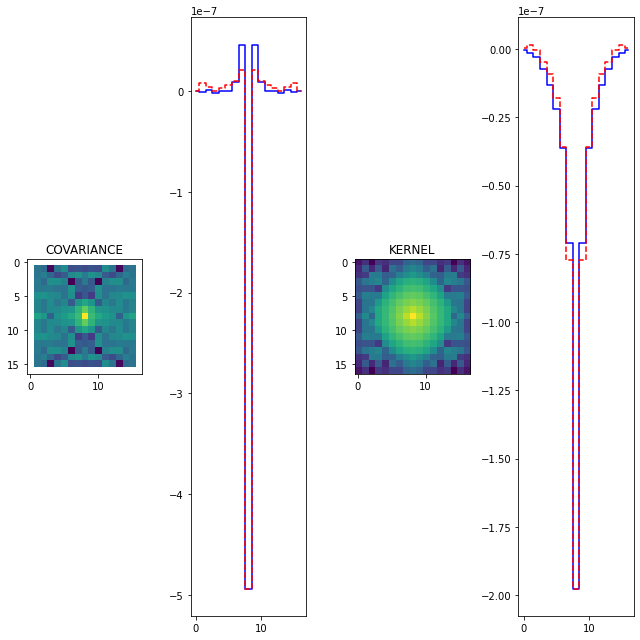

In [6]:
for ch in range(16):
    fig, axs = pylab.subplots(1, 4, figsize=(9,9),facecolor='w')
    for i,(akey,label,sign) in enumerate([ ("MEAN_XCORRS","COVARIANCE",-1), ("KERNEL","KERNEL",1) ]):
        pixtable = new.getDict()["outputBFK"].toTable()[0][akey][ch]
        axs[0+2*i].set_title(label)
        axs[0+2*i].imshow(numpy.log10(abs(pixtable.reshape(17,17))))
#        fig, axs = pylab.subplots(1, 1, figsize=(9,9),facecolor='w')    
        axs[1+2*i].plot(pixtable.reshape(17,17)[:,8]*sign,color="blue",drawstyle='steps-mid')
        axs[1+2*i].plot(pixtable.reshape(17,17)[8,:]*sign,color="red",drawstyle='steps-mid',linestyle='--')
        pylab.tight_layout()
    pylab.show()